# scRNAseq Analysis of Tabula muris data

In [1]:
#
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

In [2]:
#
brain_counts = pd.read_csv("data/brain_counts.csv", index_col=0)

In [3]:
# check the data
brain_counts
# rows: cell names (unique identifiers)
# columns: genes

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,...,0,0,0,0,0,195,0,0,113,0
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,...,0,0,0,0,125,0,1,0,0,0
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.MAA000926.3_9_M.1.1,0,111,0,0,32,55,63,0,0,0,...,0,0,0,0,4,12,64,0,3,0
P9.MAA000930.3_8_M.1.1,0,223,2,0,0,49,0,0,0,0,...,0,0,0,10,1,50,2,0,0,0
P9.MAA000932.3_11_M.1.1,0,135,41,0,0,0,0,0,0,0,...,0,19,0,0,18,0,0,0,45,0
P9.MAA000935.3_8_M.1.1,0,129,54,0,0,209,0,0,0,0,...,0,0,0,1,0,0,0,0,57,0


In [4]:
#
brain_counts.shape

(3401, 23433)

In [5]:
# load metadata
metadata = pd.read_csv("data/brain_metadata.csv", index_col=0)

In [6]:
# check the metadata
metadata

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923
...,...,...,...,...,...
P9.MAA000926.3_9_M.1.1,oligodendrocyte precursor cell,Cortex,M,3_9_M,MAA000926
P9.MAA000930.3_8_M.1.1,astrocyte,Cortex,M,3_8_M,MAA000930
P9.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932


In [7]:
#
metadata.shape

(3401, 5)

In [8]:
# check value counts for each column
col = 0
for i in metadata.columns.values:
    print("*** " + metadata.columns[col] + " ***")
    print(metadata[i].value_counts())
    print("-"*50)
    col+=1

*** cell_ontology_class ***
oligodendrocyte                   1574
endothelial cell                   715
astrocyte                          432
neuron                             281
oligodendrocyte precursor cell     203
brain pericyte                     156
Bergmann glial cell                 40
Name: cell_ontology_class, dtype: int64
--------------------------------------------------
*** subtissue ***
Cortex         1149
Hippocampus     976
Striatum        723
Cerebellum      553
Name: subtissue, dtype: int64
--------------------------------------------------
*** mouse.sex ***
M    2694
F     707
Name: mouse.sex, dtype: int64
--------------------------------------------------
*** mouse.id ***
3_10_M    980
3_9_M     871
3_8_M     590
3_38_F    355
3_11_M    253
3_39_F    241
3_56_F    111
Name: mouse.id, dtype: int64
--------------------------------------------------
*** plate.barcode ***
MAA000560    287
MAA000926    263
MAA000581    190
MAA000944    184
MAA000932    174
MAA00189

In [9]:
# build a AnnData object (=annotated data)
annotated_data = sc.AnnData(X=brain_counts, obs=metadata)
annotated_data

AnnData object with n_obs × n_vars = 3401 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'

In [10]:
# check the AnnData obj
print("Gene names: ")
print(annotated_data.var_names)

Gene names: 
Index(['0610005C13Rik', '0610007C21Rik', '0610007L01Rik', '0610007N19Rik',
       '0610007P08Rik', '0610007P14Rik', '0610007P22Rik', '0610008F07Rik',
       '0610009B14Rik', '0610009B22Rik',
       ...
       'Zxdb', 'Zxdc', 'Zyg11a', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3', 'a',
       'l7Rn6', 'zsGreen_transgene'],
      dtype='object', length=23433)


In [11]:
# find spike-ins
spike_ins = {}
num_spike_ins = 0

for gene in annotated_data.var_names:
    if 'ERCC' in gene:
        spike_ins[gene] = True
        num_spike_ins += 1
    else:
        spike_ins[gene] = False
        
annotated_data.var['ERCC'] = pd.Series(spike_ins)
print('Number of spike-ins: ', num_spike_ins)

Number of spike-ins:  92


In [12]:
#
annotated_data

AnnData object with n_obs × n_vars = 3401 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'
    var: 'ERCC'

In [13]:
# save AnnData
#annotated_data.write("../data/brain_annotated_data_obj.h5ad")

## Data Preprocessing - Quality control

In [14]:
# load annotated AnnData object
#annotated_data = sc.read("../data/brain_annotated_data_obj.h5ad")

In [15]:
# computation of qc metrics (for cells and for genes)
# 
quality_ctrl = sc.pp.calculate_qc_metrics(annotated_data)
print(type(quality_ctrl))
quality_ctrl

<class 'tuple'>


(                         n_genes_by_counts  log1p_n_genes_by_counts  \
 cell                                                                  
 A1.B003290.3_38_F.1.1                 3359                 8.119696   
 A1.B003728.3_56_F.1.1                 1718                 7.449498   
 A1.MAA000560.3_10_M.1.1               3910                 8.271548   
 A1.MAA000564.3_10_M.1.1               4352                 8.378621   
 A1.MAA000923.3_9_M.1.1                2248                 7.718241   
 ...                                    ...                      ...   
 P9.MAA000926.3_9_M.1.1                3982                 8.289791   
 P9.MAA000930.3_8_M.1.1                5047                 8.526747   
 P9.MAA000932.3_11_M.1.1               3557                 8.176954   
 P9.MAA000935.3_8_M.1.1                2920                 7.979681   
 P9.MAA001894.3_39_F.1.1               1483                 7.302496   
 
                          total_counts  log1p_total_counts  \


In [16]:
# get additional information about the spike-ins
quality_ctrl = sc.pp.calculate_qc_metrics(annotated_data, qc_vars=["ERCC"])
quality_ctrl

(                         n_genes_by_counts  log1p_n_genes_by_counts  \
 cell                                                                  
 A1.B003290.3_38_F.1.1                 3359                 8.119696   
 A1.B003728.3_56_F.1.1                 1718                 7.449498   
 A1.MAA000560.3_10_M.1.1               3910                 8.271548   
 A1.MAA000564.3_10_M.1.1               4352                 8.378621   
 A1.MAA000923.3_9_M.1.1                2248                 7.718241   
 ...                                    ...                      ...   
 P9.MAA000926.3_9_M.1.1                3982                 8.289791   
 P9.MAA000930.3_8_M.1.1                5047                 8.526747   
 P9.MAA000932.3_11_M.1.1               3557                 8.176954   
 P9.MAA000935.3_8_M.1.1                2920                 7.979681   
 P9.MAA001894.3_39_F.1.1               1483                 7.302496   
 
                          total_counts  log1p_total_counts  \


In [17]:
# store the cell quality ctrl and the gene quality ctrl in extra vars
cell_quality = quality_ctrl[0]
gene_quality = quality_ctrl[1]

In [18]:
# check cell quality
cell_quality

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_ERCC,log1p_total_counts_ERCC,pct_counts_ERCC
cell,,,,,,,,,,,
A1.B003290.3_38_F.1.1,3359,8.119696,390075.0,12.874097,25.884766,32.847017,42.219573,59.472666,10201.0,9.230339,2.615138
A1.B003728.3_56_F.1.1,1718,7.449498,776439.0,13.562474,43.051933,52.912721,65.313309,87.315423,67351.0,11.117688,8.674345
A1.MAA000560.3_10_M.1.1,3910,8.271548,1616087.0,14.295519,44.066006,51.514553,60.164211,74.451190,29870.0,10.304644,1.848292
A1.MAA000564.3_10_M.1.1,4352,8.378621,360004.0,12.793873,41.650926,48.958623,56.997422,69.736170,2592.0,7.860571,0.719992
A1.MAA000923.3_9_M.1.1,2248,7.718241,290282.0,12.578611,63.392494,69.136908,77.168753,90.522320,11002.0,9.305923,3.790107
...,...,...,...,...,...,...,...,...,...,...,...
P9.MAA000926.3_9_M.1.1,3982,8.289791,252305.0,12.438398,49.653792,53.704841,59.573136,70.920909,2453.0,7.805475,0.972236
P9.MAA000930.3_8_M.1.1,5047,8.526747,424554.0,12.958797,41.304993,47.242518,54.354923,66.141881,2674.0,7.891705,0.629837
P9.MAA000932.3_11_M.1.1,3557,8.176954,454857.0,13.027740,30.581260,38.235094,47.988049,65.310416,10252.0,9.235326,2.253895


In [19]:
# check gene quality
gene_quality

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
0610005C13Rik,28,0.118201,0.111721,99.176713,402.0,5.998937
0610007C21Rik,2399,206.211990,5.333742,29.461923,701327.0,13.460731
0610007L01Rik,961,35.938549,3.609256,71.743605,122227.0,11.713643
0610007N19Rik,272,6.498383,2.014687,92.002352,22101.0,10.003424
0610007P08Rik,582,16.328728,2.852366,82.887386,55534.0,10.924768
...,...,...,...,...,...,...
Zzef1,937,29.685974,3.423806,72.449280,100962.0,11.522510
Zzz3,992,27.208467,3.339622,70.832108,92536.0,11.435364
a,10,0.022052,0.021813,99.705969,75.0,4.330733
l7Rn6,1145,48.354897,3.899037,66.333431,164455.0,12.010398


### QC for cells

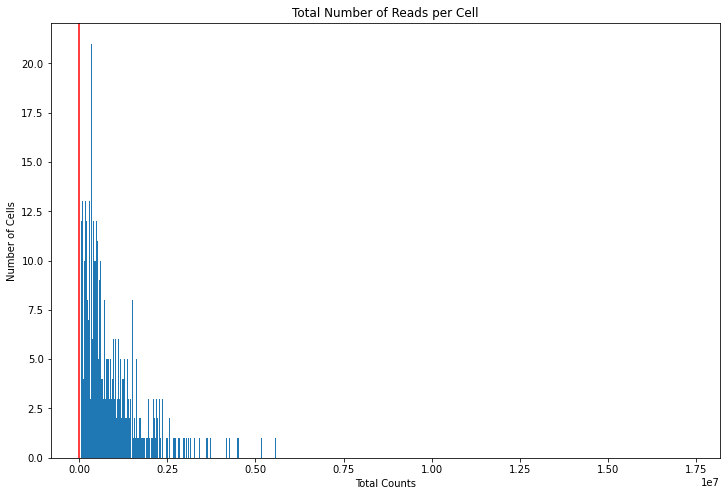

In [20]:
# plot total number of reads per cell and check for existing cell with less than 50.000 reads
plt.figure(figsize=(12, 8))
plt.hist(cell_quality['total_counts'], bins=5000)
plt.axvline(50.000, color='red')
plt.title('Total Number of Reads per Cell')
plt.xlabel('Total Counts')
plt.ylabel('Number of Cells')
plt.show()

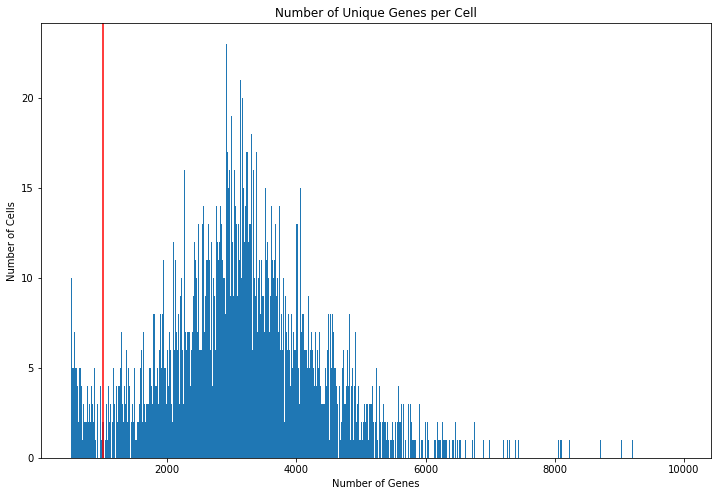

In [21]:
# plot number of unique genes per cell
plt.figure(figsize=(12, 8))
plt.hist(cell_quality['n_genes_by_counts'], bins=1000)
plt.title('Number of Unique Genes per Cell')
plt.xlabel('Number of Genes')
plt.ylabel('Number of Cells')
plt.axvline(1000, color='red')
plt.show()

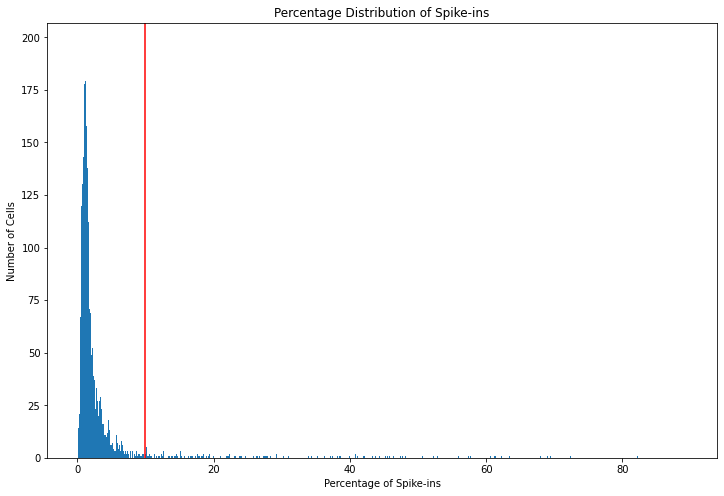

In [22]:
# plot percentage of spike-ins
plt.figure(figsize=(12, 8))
plt.hist(cell_quality['pct_counts_ERCC'], bins=1000)
plt.title('Percentage Distribution of Spike-ins')
plt.xlabel('Percentage of Spike-ins')
plt.ylabel('Number of Cells')
plt.axvline(10, color='red')
plt.show()

In [23]:
# remove cells with more than 10 % spike-ins
less_10_spike_ins = cell_quality['pct_counts_ERCC'] < 10
annotated_data = annotated_data[less_10_spike_ins]

### QC for genes

In [24]:
annotated_data

View of AnnData object with n_obs × n_vars = 3218 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'
    var: 'ERCC'

In [25]:
# reserve only cells with minimum of 750 genes
sc.pp.filter_cells(annotated_data, min_genes=750)

Trying to set attribute `.obs` of view, copying.


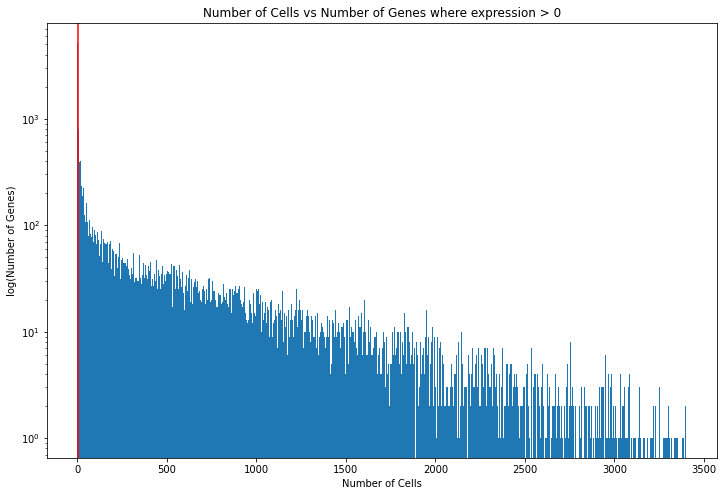

In [26]:
# plot number of cells vs number of genes
plt.figure(figsize=(12, 8))
plt.hist(gene_quality['n_cells_by_counts'], bins=1000)
# "n_cells_by_counts": number of cells containing genes with an expression > 0
plt.title('Number of Cells vs Number of Genes where expression > 0')
plt.xlabel('Number of Cells')
plt.ylabel('log(Number of Genes)')
plt.yscale('log')
plt.axvline(2, color='red')
plt.show()

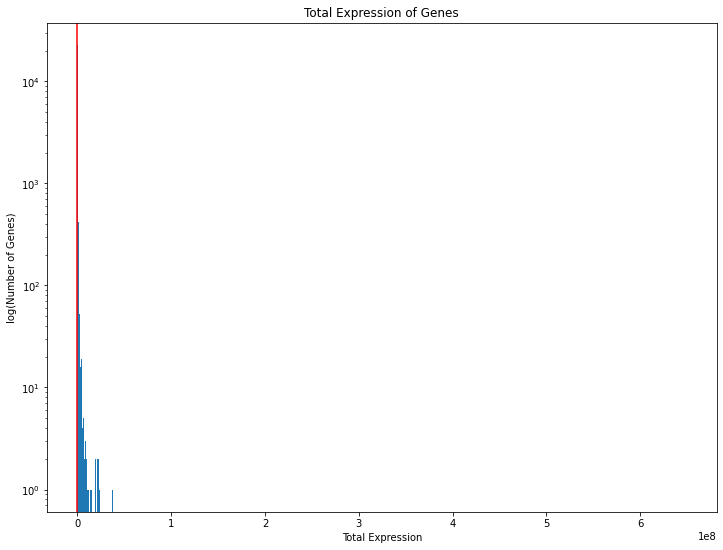

In [27]:
# plot total expression in genes
plt.figure(figsize=(12, 9))
plt.hist(gene_quality['total_counts'], bins=1000)
# "total_counts": sum of expression values for a given gene
plt.title('Total Expression of Genes')
plt.xlabel('Total Expression')
plt.ylabel('log(Number of Genes)')
plt.yscale('log')
plt.axvline(10, color='red')
plt.show()

In [28]:
# check number of genes before filtering
annotated_data

AnnData object with n_obs × n_vars = 3210 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC'

In [29]:
# filter genes
# Definition of a detectable gene:
# 2 cells need to contain > 5 reads from the gene
sc.pp.filter_genes(annotated_data, min_cells=2)
sc.pp.filter_genes(annotated_data, min_counts=10)

In [30]:
# check number of genes after filtering
annotated_data

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'

In [31]:
# store annotated data
#annotated_data.write("../data/brain_annotated_data_quality.h5ad")

## Data Preprocessing - PCA

In [32]:
# apply PCA on data
sc.pp.pca(annotated_data)

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


<Figure size 864x864 with 0 Axes>

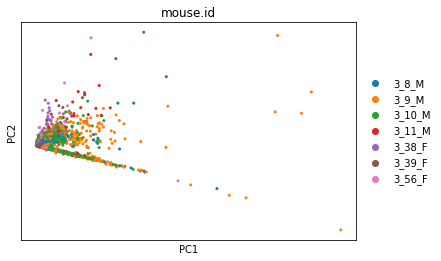

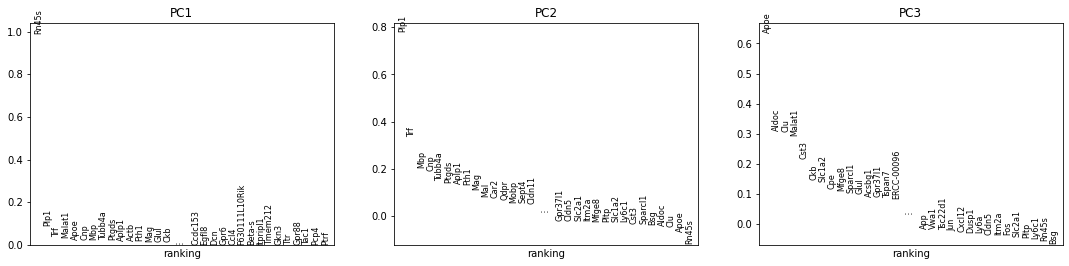

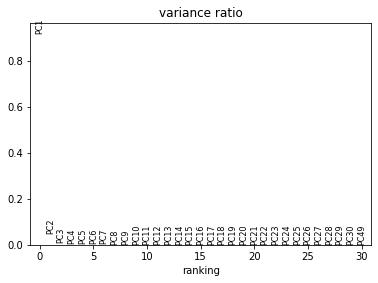

In [33]:
# plot PCA results
plt.figure(figsize=(12, 12))
sc.pl.pca_overview(annotated_data, color='mouse.id', return_fig=False)
# 1st) PC1 vs PC2 diagram
# 2nd) Loadings = how much contributes a variable to a PC
# 3rd) how much contributes a PC to the variation of the data

## Data preprocessing - Normalization

### Normalization using CPM (counts per million)
- convert data to counts per million by dividing each cell (row) by a size factor (= sum of all counts in the row) and then multiply by 1x10⁶

In [34]:
# apply CPM
data_cpm = annotated_data.copy()
data_cpm.raw = data_cpm
sc.pp.normalize_per_cell(data_cpm, counts_per_cell_after=1e6)

In [35]:
# apply PCA on normalized data
sc.pp.pca(data_cpm)

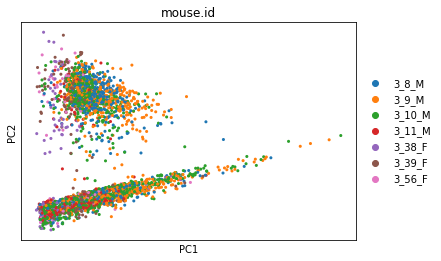

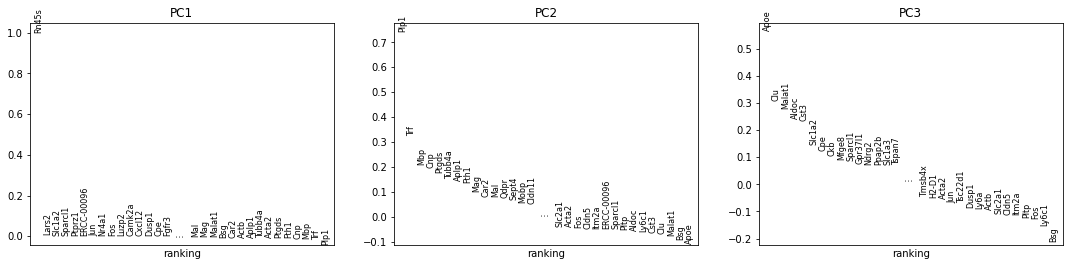

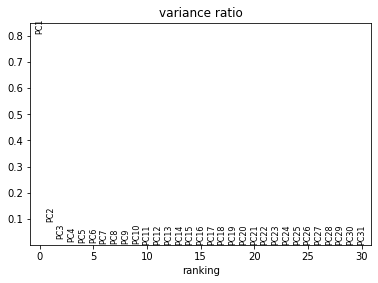

In [36]:
# show PCA results
sc.pl.pca_overview(data_cpm, color='mouse.id')

In [37]:
# apply normalization using CPM and exclude highly expressed genes from the size factor calculation
data_cpm_ex_high_expressed = data_cpm.copy()
sc.pp.normalize_total(data_cpm_ex_high_expressed, target_sum=1e6, exclude_highly_expressed=True)

In [38]:
# apply PCA
sc.pp.pca(data_cpm_ex_high_expressed)

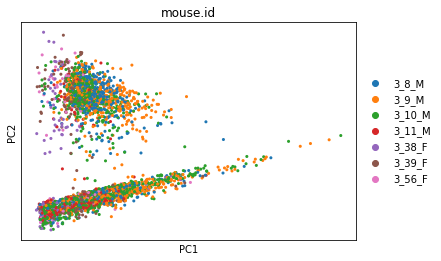

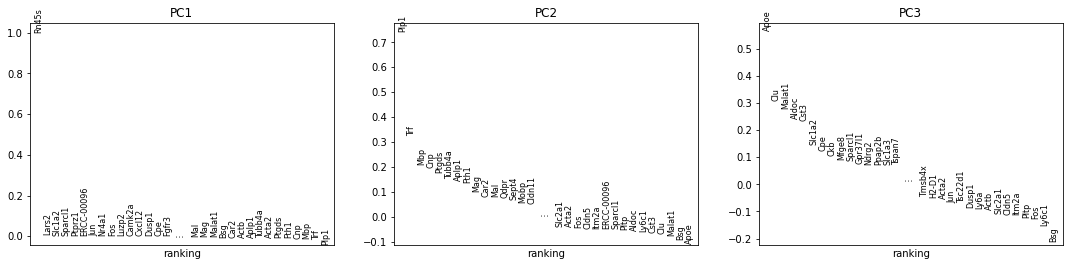

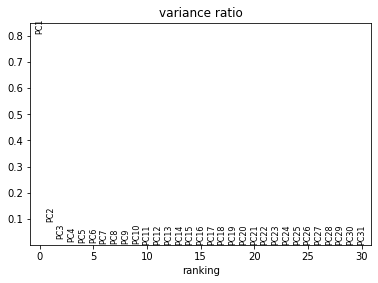

In [39]:
# show PCA results
sc.pl.pca_overview(data_cpm, color='mouse.id')

##### Normalizing gene expression

In [40]:
# remove gene Rn45s and apply PCA again
mask_Rn45s = data_cpm.var.index != 'Rn45s'
data_without_Rn45s = data_cpm[:, mask_Rn45s]

In [41]:
# apply PCA
sc.pp.pca(data_without_Rn45s)

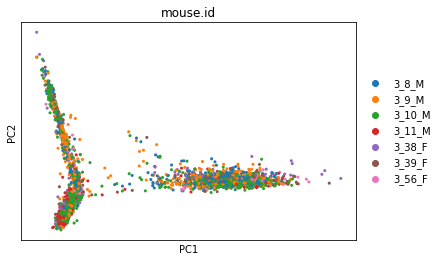

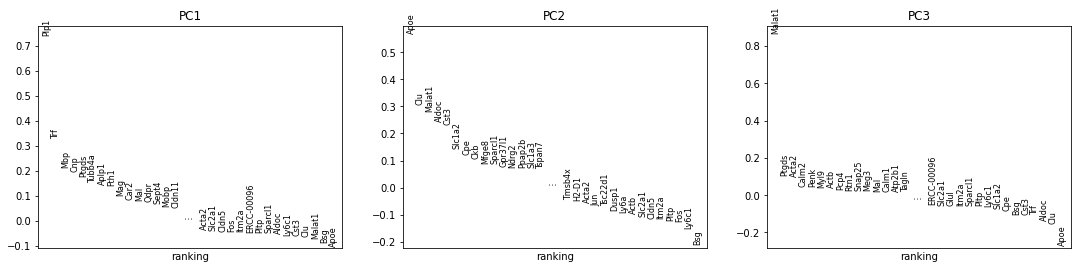

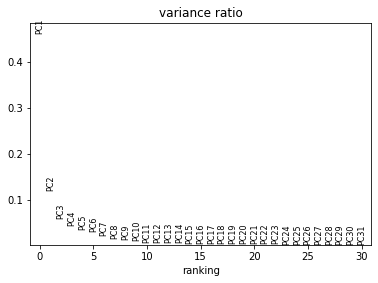

In [42]:
# show PCA results
sc.pl.pca_overview(data_without_Rn45s, color='mouse.id')

##### Scaling the expression values

In [43]:
# log(1+x) of each value
sc.pp.log1p(data_cpm)

# scaling each value using z-score
sc.pp.scale(data_cpm)

In [44]:
# PCA
sc.pp.pca(data_cpm)

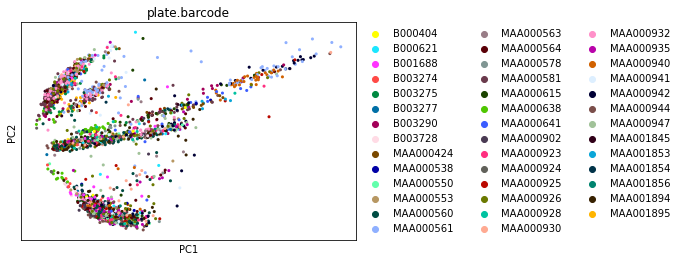

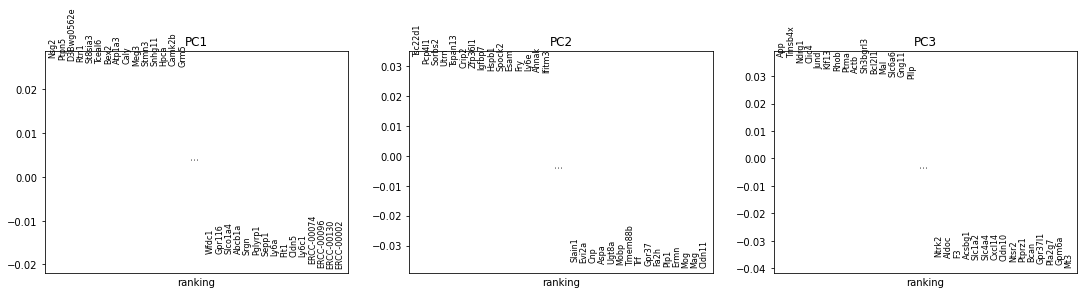

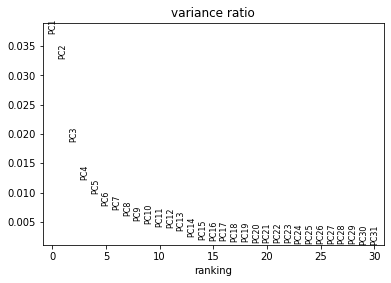

In [45]:
# PCA results
sc.pl.pca_overview(data_cpm, color='plate.barcode')

In [46]:
# store normalized data
#data_cpm.write("../data/brain_annotated_data_normalized.h5ad")

## Data Analysis - Dimensionality Reduction

### tSNE (t-Distributed Stochastic Neighbor Embedding)

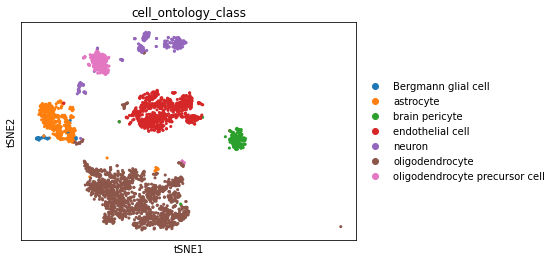

In [49]:
# apply tSNE and show results
sc.tl.tsne(data_cpm, perplexity=45, learning_rate=800, random_state=42)
sc.pl.tsne(data_cpm, color='cell_ontology_class')

In [57]:
# store tSNE results
#data_cpm.write('data/brain_annotated_data_tsne.h5ad')